# What's in this notebook?
Creating features:
- length
- number of different types of punctuation (!, ?, ", ..., $)
- if there are words in all caps
- number of curse words
- number of first person pronouns
- number of second and third person pronouns
- if they use WIBTA versus AITA
- average number of words per sentence
- sentiment
- similarity between title and description
- count vectorization (or tf-idf or word2vec, etc?)

Visualization of these features

Note: In this notebook, posts that are classified as "not the asshole" are referred to as "NTA" and posts that are classified as "asshole" as referred to as "TA".

In [2]:
import pandas as pd

In [3]:
import pickle

with open('preprocessed_data.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)

data

,judgement,id,description,title,url,author_flair
id,,,,,,
1fy0bx,0,1fy0bx,I work in an office that requires me to wear a...,AItA: I like air conditioning and my coworkers...,http://www.reddit.com/r/AmItheAsshole/comments...,Asshole #1
1ytxov,1,1ytxov,[Here is the post in question](http://www.redd...,[AITA] I wrote an explanation in TIL and came ...,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yu29c,1,1yu29c,"My parents are diabetic, morbidly obese, and a...",[AITA] Threw my parent's donuts away,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yu8hi,0,1yu8hi,I was four.,I told a goth girl she looked like a clown.,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yuc78,1,1yuc78,http://www.reddit.com/r/HIMYM/comments/1vvfkq/...,[AItA]: Argument I had with another redditor i...,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yugsc,1,1yugsc,I love the musical *Les Miserables*. A coworke...,AITA Had a disagreement about Les Miserables w...,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yuj95,1,1yuj95,Backstory: I'm a semi-professional competitive...,"[AITA] I 'hacked' our house router, changed th...",http://www.reddit.com/r/AmItheAsshole/comments...,None
1yukgb,0,1yukgb,2 Years ago my friend makes out with this girl...,[AITA] High School bullshit,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yux10,1,1yux10,His name is Scoop. \n\nOver the two years I ha...,[ATIA] I permanently give a customer decaf.,http://www.reddit.com/r/AmItheAsshole/comments...,None


In [4]:
data = data.astype({'judgement': 'int32'}, inplace=True)

In [5]:
data.dtypes

judgement        int32
id              object
description     object
title           object
url             object
author_flair    object
dtype: object

In [132]:
# just looking at the class distribution first
import seaborn as sns

data.judgement.value_counts()[1]

556

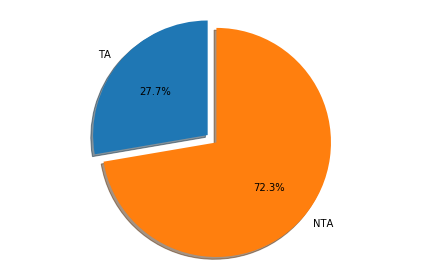

In [136]:
# Pie chart
labels = ['TA', 'NTA']
sizes = [data.judgement.value_counts()[1], data.judgement.value_counts()[0]]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig('class_dist', dpi=200)
plt.show()

## Feature: Length of description
Do TA posts tend to me more lengthy?

In [6]:
import re 

data['length'] = data['description'].apply(lambda x: len(re.split(r'\n|\s', x)))

In [7]:
import seaborn as sns
ax = sns.kdeplot(data[['length', 'judgement']][data['judgement'] == 0]['length'], shade = True, label="NTA")
ax = sns.kdeplot(data[['length', 'judgement']][data['judgement'] == 1]['length'], shade = True, label="TA")
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Length for TA vs NTA')

fig = ax.get_figure()

## Feature: Punctuation Frequency
There are a few kinds of punctuation we'll look at --
- ?
- !
- "
- ...
- $

In [8]:
# defining a function to count the given punctuation
def punc_count(punc, sentence):
    return sum(1 for char in sentence if char == punc)


data['exclam_count'] = data.apply(lambda x: punc_count('!', x.description), axis=1)
data['question_count'] = data.apply(lambda x: punc_count('?', x.description), axis=1)
# divide quotes by 2 since they come in pairs
data['quote_count'] = data.apply(lambda x: punc_count('"', x.description)/2, axis=1)
data['dollar_count'] = data.apply(lambda x: punc_count('$', x.description), axis=1)

In [9]:
def ellipse_count(sentence):
    return sum(1 for char in sentence.split('...')) - 1
    
data['ellipse_count'] = data.apply(lambda x: ellipse_count(x.description), axis=1)

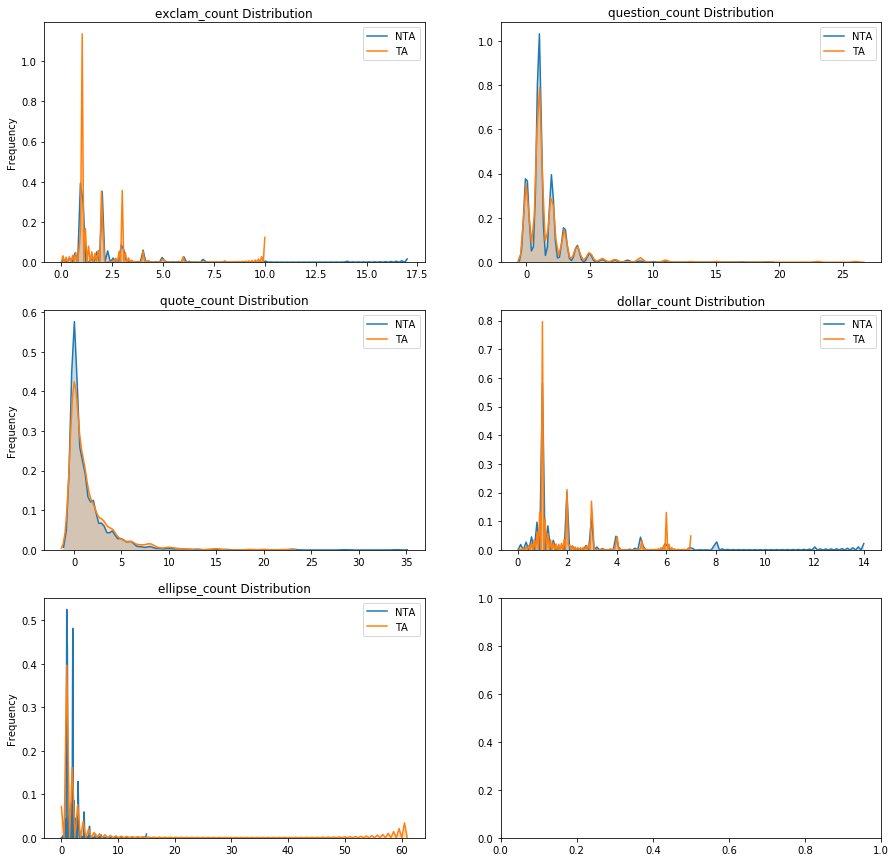

In [40]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(3, 2)
f.set_size_inches(15, 15)
punc_dict = {0: 'exclam_count', 1: 'question_count', 2: 'quote_count',
            3: 'dollar_count', 4: 'ellipse_count'}
for i in range(0, 2):
    sns.kdeplot(data[data['judgement'] == 0][punc_dict[i]], shade = True, label="NTA", ax=axes[0][i])
    sns.kdeplot(data[data['judgement'] == 1][punc_dict[i]], shade = True, label="TA", ax=axes[0][i])
    axes[0][i].legend()
    axes[0][i].set(title=f'{punc_dict[i]} Distribution')

for i in range(2, 4):
    sns.kdeplot(data[data['judgement'] == 0][punc_dict[i]], shade = True, label="NTA", ax=axes[1][i-2])
    sns.kdeplot(data[data['judgement'] == 1][punc_dict[i]], shade = True, label="TA", ax=axes[1][i-2])
    axes[1][i-2].legend()
    axes[1][i-2].set(title=f'{punc_dict[i]} Distribution')
    
for i in range(4, 5):
    sns.kdeplot(data[data['judgement'] == 0][punc_dict[i]], shade = True, label="NTA", ax=axes[2][i-4])
    sns.kdeplot(data[data['judgement'] == 1][punc_dict[i]], shade = True, label="TA", ax=axes[2][i-4])
    axes[2][i-4].legend()
    axes[2][i-4].set(title=f'{punc_dict[i]} Distribution')
    
for i in range(0, 3):    
    axes[i][0].set(ylabel='Frequency')



## Feature: Do they write any words in all caps?
This only includes actual words, not abbrevations like 'ER' for 'emergency room'. Checking if it was a word was tricky and a bit messy.

In [41]:
# getting a dictionary
import urllib.request

dictionary = [re.sub(r'b|\\n|\'', '',str(line)) for line in urllib.request.urlopen('https://users.cs.duke.edu/~ola/ap/linuxwords')]
# from nltk.corpus import words

def count_caps(sentence):
    count = 0
    # split sentence on common word splitters like punctuation or spaces.
    for x in re.split(r'[.,"!()\'?]+|\s|\n', sentence):
        # make sure there's an actual word
        if x != '':
            # if it's not a word formatted as "word" or "Word"
            if not(x in dictionary or (x[0].lower()+x[1:] in dictionary)):
                # and if it's an actual word and not "AACCKK", or something like that
                if x.lower() in dictionary:
                    count += 1 
    return count
#     return sum(1 for word in re.split(r'[.,"!()\'?]+|\s', sentence) 
#                if word in words.words() and (word.lower() == word or word.title() == word))

data.apply(lambda x: count_caps(x.description), axis=1)

id
1fy0bx    0
1ytxov    0
1yu29c    0
1yu8hi    0
1yugsc    1
1yuj95    0
1yukgb    0
1yux10    0
1yux60    0
1yvb3n    0
1yvd1v    0
1yvjiw    2
1yvl8z    0
1yw0t4    6
1yx8vp    0
1yxbgt    0
1yxnp3    0
1yy4gj    0
1yy4n3    0
1yy70j    0
1yyach    0
1yyfen    0
1yz27l    0
1yztv6    0
1yzwl6    0
1z02r7    0
1z245r    1
1z2r6y    0
1z313z    0
1z35di    0
         ..
73o31i    2
74zqrn    0
75b49v    1
7k0k9i    0
7l2hf4    1
7lcgz6    0
7lgtb6    0
7lgv4y    0
7lhlsb    0
7lkaat    1
7ll4i6    1
7ln48m    0
7loai6    0
7lohkj    1
7lqo5n    0
7lr6me    0
7lse9n    0
7lsi7c    1
7lsmyq    0
7ltuvf    0
7lv0l5    0
7lvnw3    0
7lwm8z    0
7lytbs    1
7lz0kj    1
7lz0za    0
7lz93l    0
7lzm9c    0
7lzx65    0
7m3pjr    1
Length: 2008, dtype: int64

In [42]:
data['num_caps'] = _

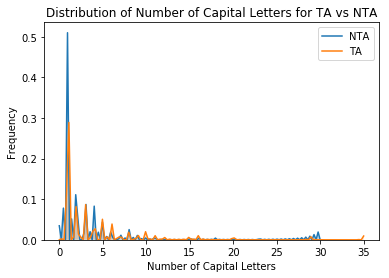

In [43]:
ax = sns.kdeplot(data[data['judgement'] == 0]['num_caps'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['num_caps'], shade = True, label="TA")
ax.set_xlabel('Number of Capital Letters')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Number of Capital Letters for TA vs NTA')

fig = ax.get_figure()

## Feature: Number of curse words
The cursewords are taken from a text file on github containing all of the words that Google blocks. Reader beware -- reading this list is not advisable if you're not one for profanity! It's really quite uncomfortable to read.

In [44]:
# get google's list of curse words
cursewords = [re.sub(r'^b|\\n|\'', '',str(line)) for line in urllib.request.urlopen('https://raw.githubusercontent.com/RobertJGabriel/Google-profanity-words/master/list.txt')]

cursewords.extend(['gtfo', 'dickish'])
cursewords.pop(cursewords.index('asshole'))

'asshole'

In [45]:
def count_curses(sentence):
    return sum(1 for word in re.split(r'[.,"!()\'?]+|\s|\n', sentence) if word.lower() in cursewords)

In [46]:
print(data.description.iloc[10])
count_curses(data.description.iloc[10])

I went to a hockey game at my college and since I didn't have season tickets to sit in the student section, got the nosebleed seats around center ice about 6 rows from the top.  It was against our rivals, so the seats were packed.  Every time the action came around the boards on our side, I had to stand up to see what was happening.  I also stood when we got close to scoring a goal.  The people behind me were pissed that I kept standing up and told me to just watch what was happening on the jumbotron.  My thoughts were that if I wanted to sit down and watch the game on a screen, I would have stayed at home and watched from my couch.  What are your thoughts; am I the asshole?


/Users/hannah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


1

In [47]:
data.apply(lambda x: count_curses(x.description), axis=1)

/Users/hannah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


id
1fy0bx    1
1ytxov    0
1yu29c    0
1yu8hi    0
1yugsc    1
1yuj95    0
1yukgb    0
1yux10    0
1yux60    0
1yvb3n    4
1yvd1v    1
1yvjiw    0
1yvl8z    0
1yw0t4    2
1yx8vp    0
1yxbgt    0
1yxnp3    0
1yy4gj    0
1yy4n3    4
1yy70j    1
1yyach    0
1yyfen    4
1yz27l    0
1yztv6    3
1yzwl6    0
1z02r7    1
1z245r    3
1z2r6y    3
1z313z    0
1z35di    0
         ..
73o31i    7
74zqrn    1
75b49v    2
7k0k9i    2
7l2hf4    0
7lcgz6    2
7lgtb6    0
7lgv4y    0
7lhlsb    0
7lkaat    6
7ll4i6    0
7ln48m    0
7loai6    3
7lohkj    0
7lqo5n    0
7lr6me    1
7lse9n    0
7lsi7c    0
7lsmyq    2
7ltuvf    0
7lv0l5    4
7lvnw3    0
7lwm8z    0
7lytbs    0
7lz0kj    3
7lz0za    0
7lz93l    0
7lzm9c    1
7lzx65    4
7m3pjr    0
Length: 2008, dtype: int64

In [48]:
data['curse_count'] = _

In [49]:
data.curse_count.value_counts()

0     1128
1      416
2      196
3       95
4       68
5       39
6       23
7       14
8        9
9        7
10       2
11       2
12       2
14       2
18       2
20       1
19       1
22       1
Name: curse_count, dtype: int64

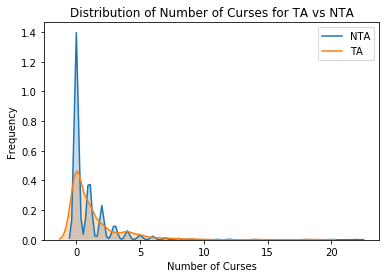

In [50]:
ax = sns.kdeplot(data[data['judgement'] == 0]['curse_count'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['curse_count'], shade = True, label="TA")
ax.set_xlabel('Number of Curses')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Number of Curses for TA vs NTA')

fig = ax.get_figure()

## Feature: Number of pronouns
We'll split this up by first person (personal) pronouns and third person pronouns.

### First Person

In [51]:
first_person_pronouns = ['I', 'me', 'we', 'us', 'myself', 
                        'ourselves', 'my', 'mine', 'ours']
def count_fpp(sentence):
    return sum(1 for word in re.split(r'[.,"!()\'?]+|\s|\n', sentence) if word.lower() in first_person_pronouns)

data['fpp_count'] = data.apply(lambda x: count_fpp(x.description), axis=1)

/Users/hannah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


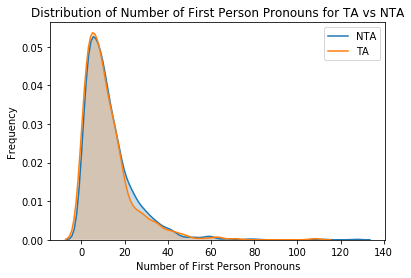

In [52]:
ax = sns.kdeplot(data[data['judgement'] == 0]['fpp_count'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['fpp_count'], shade = True, label="TA")
ax.set_xlabel('Number of First Person Pronouns')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Number of First Person Pronouns for TA vs NTA')

fig = ax.get_figure()

### Third Person

In [53]:
third_person_pronouns = ['she', 'her', 'he', 'him', 'they'
                            'them', 'himself', 'herself',
                            'themselves', 'his', 'hers',
                            'theirs']
def count_tpp(sentence):
    return sum(1 for word in re.split(r'[.,"!()\'?]+|\s|\n', sentence) if word.lower() in third_person_pronouns)
data['tpp_count'] = data.apply(lambda x: count_tpp(x.description), axis=1)

/Users/hannah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


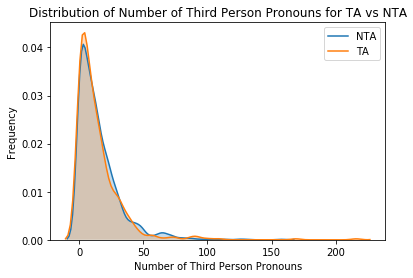

In [54]:
ax = sns.kdeplot(data[data['judgement'] == 0]['tpp_count'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['tpp_count'], shade = True, label="TA")
ax.set_xlabel('Number of Third Person Pronouns')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Number of Third Person Pronouns for TA vs NTA')

fig = ax.get_figure()

### Difference in first and third person pronoun frequency

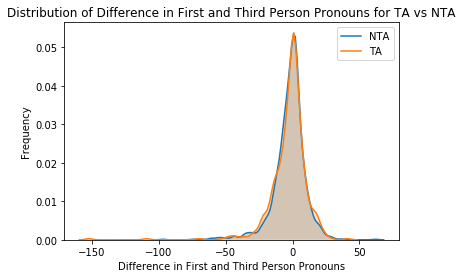

In [55]:
data['ftpp_diff'] = data.apply(lambda x: x.fpp_count - x.tpp_count, axis=1)

ax = sns.kdeplot(data[data['judgement'] == 0]['ftpp_diff'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['ftpp_diff'], shade = True, label="TA")
ax.set_xlabel('Difference in First and Third Person Pronouns')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Difference in First and Third Person Pronouns for TA vs NTA')

fig = ax.get_figure()

## Feature: WIBTA
WIBTA = 'would I be the asshole'

Does it make a difference if they ask before doing?

In [56]:
data.title.apply(lambda x: True if 'wibta' in x.lower() else False).value_counts()

False    2005
True        3
Name: title, dtype: int64

There are so few that it's not even worth putting in the data frame!

## Feature: Number of words per sentence
If you're more wordy, does that make you more/less of TA? 

In [57]:
def avg_num_words(description):
    lens = []
    for sentence in re.split(r'[.?!]+', description):
        # split gets the list of words, calling len on that gets the number of words
        # add to the list of sentence lengths
        lens.append(sum(1 for word in (re.split(r'[.!?,\"-]|\s', sentence)) if word != ''))
    # calculate and return avg
    return sum(lens)/(len(lens) - 1) if len(lens) > 1 else sum(lens)

data['avg_word_per_sent'] = data['description'].apply(lambda x: avg_num_words(x))

/Users/hannah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


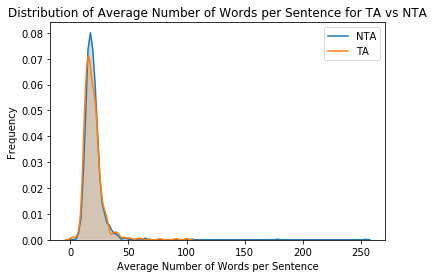

In [58]:
ax = sns.kdeplot(data[data['judgement'] == 0]['avg_word_per_sent'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['avg_word_per_sent'], shade = True, label="TA")
ax.set_xlabel('Average Number of Words per Sentence')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Average Number of Words per Sentence for TA vs NTA')

fig = ax.get_figure()

## Feature: Sentiment
Does the emotion conveyed in the title or in the description differ based on if the post is a TA post or a NTA post?

We'll try 3 different libraries with sentiment analysis: TextBlob, VADER, and Afinn. After calculating sentiment measures, then we'll visualize any differences in distribution across TA and NTA posts.

### Textblob


#### Title Sentiment

In [59]:
import textblob

# If you want subjectivity, set polarity to False
def sentiment_tb(sentence, polarity=True):
    sentence = re.sub(r'[\[AITait\]]{4,6}:?\s', '', sentence)
    if polarity == False:
        return textblob.TextBlob(sentence).sentiment.subjectivity
    return textblob.TextBlob(sentence).sentiment.polarity

data['title_pol'] = data['title'].apply(lambda x: sentiment_tb(x))
data['title_subj'] = data['title'].apply(lambda x: sentiment_tb(x, polarity=False))

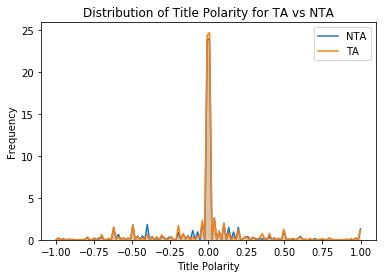

In [60]:
ax = sns.kdeplot(data[['title_pol', 'judgement']][data['judgement'] == 0]['title_pol'], shade = True, label="NTA")
ax = sns.kdeplot(data[['title_pol', 'judgement']][data['judgement'] == 1]['title_pol'], shade = True, label="TA")
ax.set_xlabel('Title Polarity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Title Polarity for TA vs NTA')

fig = ax.get_figure()

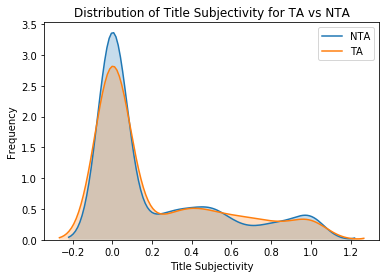

In [61]:
ax = sns.kdeplot(data[['title_subj', 'judgement']][data['judgement'] == 0]['title_subj'], shade = True, label="NTA")
ax = sns.kdeplot(data[['title_subj', 'judgement']][data['judgement'] == 1]['title_subj'], shade = True, label="TA")
ax.set_xlabel('Title Subjectivity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Title Subjectivity for TA vs NTA')

fig = ax.get_figure()

#### Description Sentiment

In [64]:
data['desc_pol'] = data['description'].apply(lambda x: sentiment_tb(x))
data['desc_subj'] = data['description'].apply(lambda x: sentiment_tb(x, polarity=False))

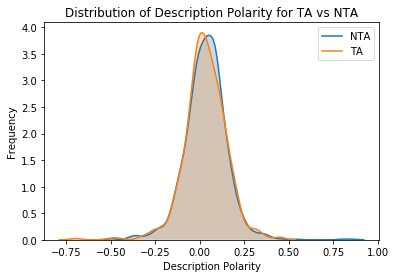

In [65]:
ax = sns.kdeplot(data[['desc_pol', 'judgement']][data['judgement'] == 0]['desc_pol'], shade = True, label="NTA")
ax = sns.kdeplot(data[['desc_pol', 'judgement']][data['judgement'] == 1]['desc_pol'], shade = True, label="TA")
ax.set_xlabel('Description Polarity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Description Polarity for TA vs NTA')

fig = ax.get_figure()

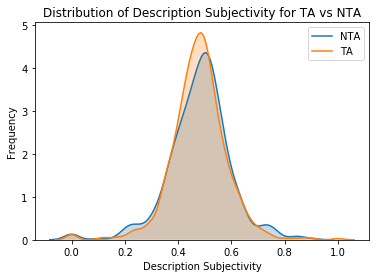

In [66]:
ax = sns.kdeplot(data[['desc_subj', 'judgement']][data['judgement'] == 1]['desc_subj'], shade = True, label="NTA")
ax = sns.kdeplot(data[['desc_subj', 'judgement']][data['judgement'] == 0]['desc_subj'], shade = True, label="TA")
ax.set_xlabel('Description Subjectivity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Description Subjectivity for TA vs NTA')

fig = ax.get_figure()

#### Sentiment Similarity

In [67]:
data['pol_similarity'] = data.apply(lambda x: x['title_pol'] - x['desc_pol'], axis=1)
data['subj_similarity'] = data.apply(lambda x: x['title_subj'] - x['desc_subj'], axis=1)

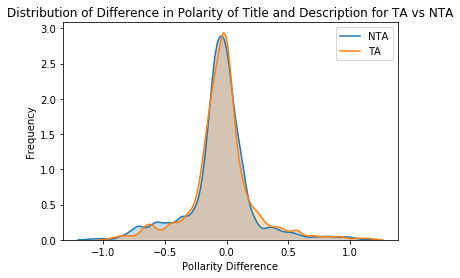

In [68]:
ax = sns.kdeplot(data[['pol_similarity', 'judgement']][data['judgement'] == 0]['pol_similarity'], shade = True, label="NTA")
ax = sns.kdeplot(data[['pol_similarity', 'judgement']][data['judgement'] == 1]['pol_similarity'], shade = True, label="TA")
ax.set_xlabel('PolIarity Difference')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Difference in Polarity of Title and Description for TA vs NTA')

fig = ax.get_figure()

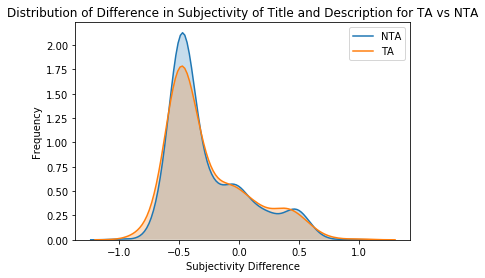

In [69]:
ax = sns.kdeplot(data[['subj_similarity', 'judgement']][data['judgement'] == 0]['subj_similarity'], shade = True, label="NTA")
ax = sns.kdeplot(data[['subj_similarity', 'judgement']][data['judgement'] == 1]['subj_similarity'], shade = True, label="TA")
ax.set_xlabel('Subjectivity Difference')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Difference in Subjectivity of Title and Description for TA vs NTA')

fig = ax.get_figure()

### VADER

In [70]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [72]:
# fast
data['title_vader'] = data['title'].apply(lambda x:analyser.polarity_scores(x)['compound'] )
# takes a minute
data['desc_vader'] = data['description'].apply(lambda x:analyser.polarity_scores(x)['compound'] )

In [73]:
data['vader_similarity'] = data.apply(lambda x: x.title_vader - x.desc_vader, axis=1)

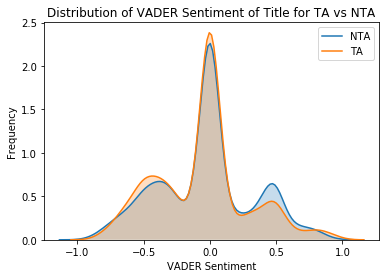

In [74]:
ax = sns.kdeplot(data[data['judgement'] == 0]['title_vader'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['title_vader'], shade = True, label="TA")
ax.set_xlabel('VADER Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of VADER Sentiment of Title for TA vs NTA')

fig = ax.get_figure()

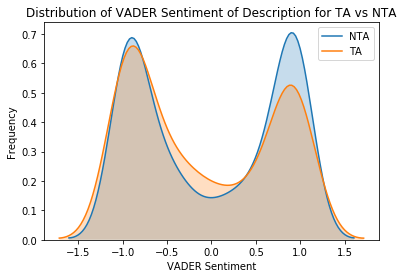

In [75]:
ax = sns.kdeplot(data[data['judgement'] == 0]['desc_vader'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['desc_vader'], shade = True, label="TA")
ax.set_xlabel('VADER Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of VADER Sentiment of Description for TA vs NTA')

fig = ax.get_figure()

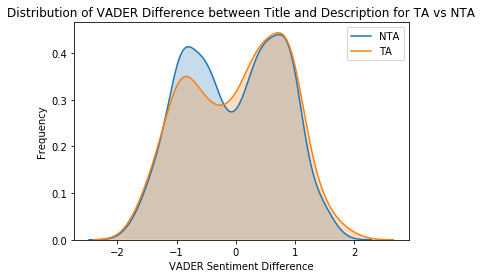

In [76]:
ax = sns.kdeplot(data[data['judgement'] == 0]['vader_similarity'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['vader_similarity'], shade = True, label="TA")
ax.set_xlabel('VADER Sentiment Difference')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of VADER Difference between Title and Description for TA vs NTA')

fig = ax.get_figure()

### Afinn

In [77]:
!pip install afinn

# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

In [78]:
data['title_af'] = data['title'].apply(lambda x: af.score(x))
data['desc_af'] = data['description'].apply(lambda x: af.score(x))
data['af_similarity'] = data.apply(lambda x: x.title_af - x.desc_af, axis=1)

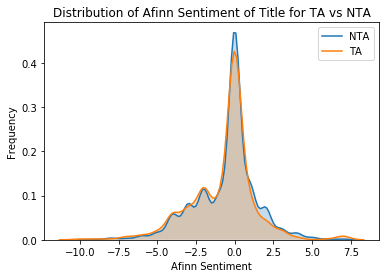

In [79]:
ax = sns.kdeplot(data[data['judgement'] == 0]['title_af'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['title_af'], shade = True, label="TA")
ax.set_xlabel('Afinn Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Afinn Sentiment of Title for TA vs NTA')

fig = ax.get_figure()

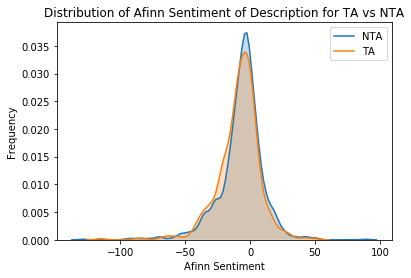

In [80]:
ax = sns.kdeplot(data[data['judgement'] == 0]['desc_af'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['desc_af'], shade = True, label="TA")
ax.set_xlabel('Afinn Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Afinn Sentiment of Description for TA vs NTA')

fig = ax.get_figure()

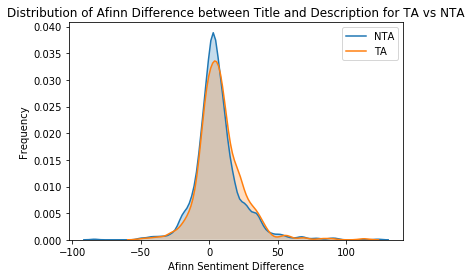

In [81]:
ax = sns.kdeplot(data[data['judgement'] == 0]['af_similarity'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['af_similarity'], shade = True, label="TA")
ax.set_xlabel('Afinn Sentiment Difference')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Afinn Difference between Title and Description for TA vs NTA')

fig = ax.get_figure()

## Feature(s): Vectorization
This hopefully will be more telling than the previous features! We have hope since the other features were more heavy handed in their creation, but we can more finely tune the creation of features here.

In [82]:
# first, a little more processing to prepare data for vectorization

from nltk.corpus import stopwords

stop_words = ['aita', 'asshole', 'nta', 'ta', 'reddit', 'I', 'i']
stop_words.extend(set(stopwords.words('english')))

In [83]:
stop_words

['aita',
 'asshole',
 'nta',
 'ta',
 'reddit',
 'I',
 'i',
 'from',
 "should've",
 're',
 'between',
 'myself',
 'who',
 'above',
 'there',
 'me',
 'too',
 'theirs',
 'been',
 "you'll",
 'll',
 "hadn't",
 'my',
 'didn',
 'yourself',
 'can',
 "didn't",
 "doesn't",
 "needn't",
 'both',
 'so',
 "wouldn't",
 'but',
 'to',
 'because',
 'weren',
 'an',
 'are',
 'm',
 'aren',
 "hasn't",
 'off',
 'other',
 've',
 'until',
 'shouldn',
 'very',
 'only',
 'during',
 'for',
 'will',
 'himself',
 'wouldn',
 'against',
 'after',
 's',
 "don't",
 'in',
 'them',
 'd',
 'isn',
 'should',
 'yourselves',
 'some',
 'had',
 "mightn't",
 'they',
 'mustn',
 'were',
 'whom',
 'him',
 'the',
 'ain',
 'couldn',
 'shan',
 "mustn't",
 'doing',
 'she',
 "shouldn't",
 'such',
 'wasn',
 "it's",
 'out',
 "she's",
 'few',
 'our',
 'that',
 'once',
 'or',
 "you've",
 'any',
 'through',
 'into',
 'is',
 'what',
 'o',
 'their',
 'here',
 'further',
 'haven',
 'it',
 'needn',
 "shan't",
 'did',
 'has',
 'have',
 'having',

In [84]:
def remove_stopwords_and_punc(sentence):
    new_sentence = ''
    for punc in ['.', '!', '?', '@', '#', '$', 
                 '%', '^', '&', '*', '(', ')', 
                '<', '>', '/', '\\', '"', ';',
                ':', '-', '_', '\n', '[', ']',
                ',']:
        sentence = sentence.replace(punc, ' ')
    for word in sentence.split(' '):
        if word.lower() not in stop_words:
            new_sentence += word.lower() + ' '
    return new_sentence[:-1]

print(data['title'].iloc[10])
remove_stopwords_and_punc(data['title'].iloc[10])

[AITA] Hockey Fan


'  hockey fan'

In [85]:
data['processed_titles'] = data['title'].apply(lambda x: remove_stopwords_and_punc(x))

In [86]:
data['processed_description'] = data['description'].apply(lambda x: remove_stopwords_and_punc(x))

I found a description that has a url in it! That'll mess up our vectorization. We should remove any urls from descriptions, and then any rows that end up having empty descriptions after that. 

In [87]:
# remove urls from descriptions
def remove_reddit_urls(description):
    desc = re.sub(r'\n', '', description)
    return re.sub(r'(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/|:\/\/www.)?(imgur|reddit)(.com/?[a-zA-Z0-9/_\?=]*)*', '',desc)

data['description'] = data.apply(lambda x: remove_reddit_urls(x.description), axis=1)

# get rid of description-less rows
data.drop(data[data['description'].str.len() == 0].index, inplace=True)


Now we want to lemmatize the description and then put it back together as a string before we start vectorizing.

In [88]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
  
lemmatizer = WordNetLemmatizer() 

data['lemmatized_desc_str'] = data.apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(x.processed_description) 
                                                             if "'" not in w and w != 'i' and w != 'ca' and w != 's' and w != "'"]), axis=1)

In [89]:
data.iloc[2005]['lemmatized_desc_str']

'boyfriend dropped lot weight small amount time actually go day without eating worry smoke lot contributes feeling hungry often overall don ’ t agree take care get fight every awhile ’ ll ask he ’ eating he ’ feeling purposely doesn ’ t eat sometimes feel sick often cure smoking get extremely pissed say ’ m selfish bug much mentioned like every week like 3 4 week time ask check part lung sensitive tobacco smoke feel extremely wheezing well ’ m near long always smoke car confined space it ’ winter window open wide like two three smoke within 10 min drive know don ’ t like make feel say ’ m one know issue guess mean doesn ’ t taken seriously ask smoke around anyway whenever bring eating always lead smoking get big fight smoke feel hungry purposely doesn ’ t eat feel awful time checking bc care he ’ eating wanting eat proper cut back smoking letting smoke car'

In [90]:
data['lemmetized'] = data['lemmatized_desc_str'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x.split(' ')
                                            if w != "’" and w != 's' and w != 'm' and w != 've' and w!='t'])

So as to avoid data leakage, we'll first train-test-split our data, then we'll get into the vectorization.

In [94]:
from sklearn.model_selection import train_test_split
feat = ['id', 'description', 'title', 'url', 'author_flair',
       'length', 'exclam_count', 'question_count', 'quote_count',
       'dollar_count', 'ellipse_count', 'tpp_count', 'avg_word_per_sent',
       'title_pol', 'title_subj', 'num_caps', 'curse_count', 'fpp_count',
       'ftpp_diff', 'desc_pol', 'desc_subj', 'pol_similarity',
       'subj_similarity', 'title_vader', 'desc_vader', 'vader_similarity',
       'title_af', 'desc_af', 'af_similarity', 'processed_titles',
       'processed_description', 'lemmatized_desc_str', 'lemmetized']
X_train, X_test, y_train, y_test = train_test_split(data[feat], data['judgement'], 
                                                    test_size = .33, random_state=42)

### TF-IDF & LSA & LDA

First we'll get the TF-IDF values for the words that aren't overly common or very uncommon.

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from pylab import *

import random

# ignores words that occur in over 70% of all texts (since the data is split 70/30 over NTA/TA)
# ignores words that occur in fewer than 3 texts
# we don't want more than 10000 features
vectorizer = TfidfVectorizer(max_df=0.7, max_features=10000,
                             min_df=10, stop_words='english',
                             use_idf=True, ngram_range=(1, 2))

In [96]:
# fits vectorizer to & transforms training data
X_train_tfidf = vectorizer.fit_transform(X_train['lemmatized_desc_str'])

In [97]:
print("  Actual number of tfidf features: %d" % X_train_tfidf.get_shape()[1])

  Actual number of tfidf features: 2355


LSA now to reduce the dimension of the tf-idf features -- we can't have too many words, since then models will overfit because there won't be enough cariation amongst all the features.

In [98]:
# set up svd
svd = TruncatedSVD(n_components=100, random_state=43)
lsa = make_pipeline(svd, Normalizer(copy=False))

# run svd
X_train_lsa = lsa.fit_transform(X_train_tfidf)

In [99]:
sum(svd.explained_variance_ratio_[0:20])

0.10987939429034588

Yikes, not too great -- it would take us 400 components just to get 70% of the variance explained by our components! If we limit ourselves to 20 components, we only get 11% of the variance explained. Hm...let's at least see what these components look like...

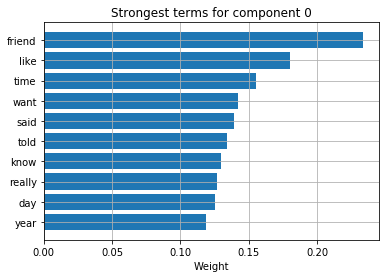

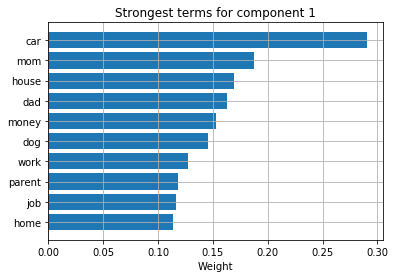

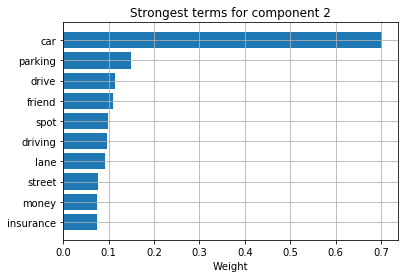

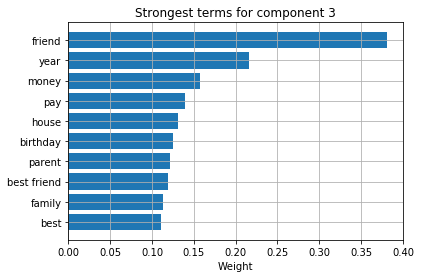

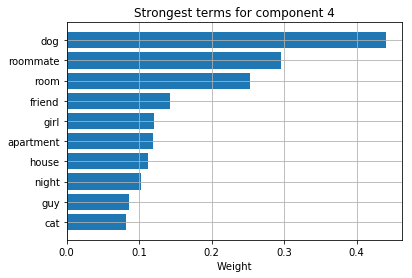

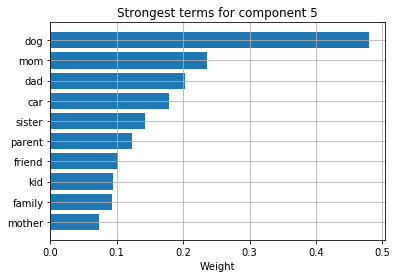

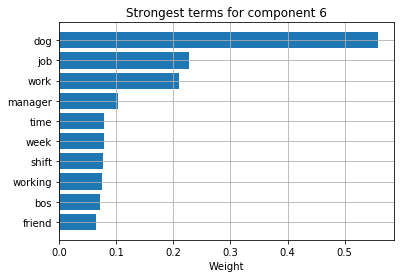

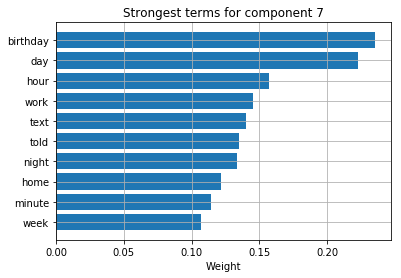

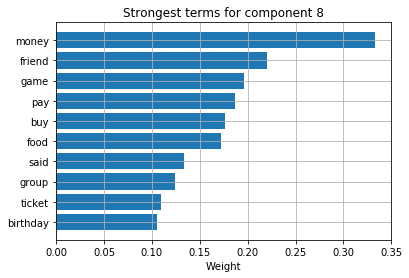

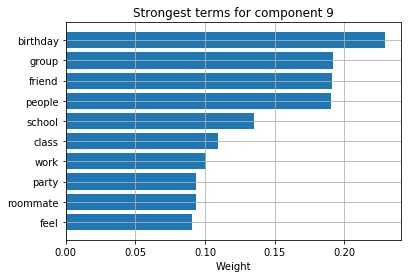

In [100]:
# taken from https://github.com/chrisjmccormick/LSA_Classification/blob/master/inspect_LSA.py
for compNum in range(0, 10):

    comp = svd.components_[compNum]
    feat_names = vectorizer.get_feature_names()
    
    # Sort the weights in the first component, and get the indeces
    indices = np.argsort(comp).tolist()
    
    # Reverse the indeces, so we have the largest weights first.
    indices.reverse()
    
    # Grab the top 10 terms which have the highest weight in this component.        
    terms = [feat_names[weightIndex] for weightIndex in indices[0:10]]    
    weights = [comp[weightIndex] for weightIndex in indices[0:10]]    
   
    # Display these terms and their weights as a horizontal bar graph.    
    # The horizontal bar graph displays the first item on the bottom; reverse
    # the order of the terms so the biggest one is on top.
    terms.reverse()
    weights.reverse()
    positions = arange(10) + .5    # the bar centers on the y axis
    
    figure(compNum)
    barh(positions, weights, align='center')
    yticks(positions, terms)
    xlabel('Weight')
    title('Strongest terms for component %d' % (compNum))
    grid(True)
    show()

Okay, that was pretty cool! You can sort of see a story there in each components 10 most strong terms! But still, not great because of the low variance explained, so we'll look at using LDA (latent dirichlet allocation).

We tried 20, 15, 12, 11, and 10 topics, and 11 turned out to be the number of topics that actually resulted in all topics being used in lda's classification (where we define their classification to be the most probable topic that a submission is assigned to) and the classifications were distributed somewhat evenly across topics.

In [102]:
import gensim
from gensim.models import LdaMulticore 
from gensim import corpora, models
from gensim.sklearn_api import TfIdfTransformer

# get all of the words in our corpus & create a bag of words
dictionary = gensim.corpora.Dictionary(X_train['lemmetized'])
bow_corpus = [dictionary.doc2bow(doc) for doc in X_train.lemmetized]

# get the tf-idf (gensim-style, using their implementation of 
# sklearn's tf-idf model) of our data
model = TfIdfTransformer()
corpus_tfidf = model.fit_transform(bow_corpus)

# use LDA to get 10 topics to split up our descriptions into
lda_model_tfidf = LdaMulticore(corpus_tfidf, num_topics=11, id2word=dictionary, passes=2, workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.002*"friend" + 0.001*"really" + 0.001*"said" + 0.001*"told" + 0.001*"time" + 0.001*"something" + 0.001*"know" + 0.001*"year" + 0.001*"one" + 0.001*"girlfriend"
Topic: 1 Word: 0.002*"friend" + 0.001*"dog" + 0.001*"want" + 0.001*"tell" + 0.001*"told" + 0.001*"money" + 0.001*"roommate" + 0.001*"come" + 0.001*"house" + 0.001*"would"
Topic: 2 Word: 0.002*"girl" + 0.001*"friend" + 0.001*"get" + 0.001*"know" + 0.001*"year" + 0.001*"day" + 0.001*"car" + 0.001*"tell" + 0.001*"said" + 0.001*"go"
Topic: 3 Word: 0.002*"friend" + 0.001*"car" + 0.001*"year" + 0.001*"day" + 0.001*"talking" + 0.001*"house" + 0.001*"mom" + 0.001*"want" + 0.001*"like" + 0.001*"got"
Topic: 4 Word: 0.001*"car" + 0.001*"friend" + 0.001*"work" + 0.001*"week" + 0.001*"team" + 0.001*"dad" + 0.001*"day" + 0.001*"school" + 0.001*"back" + 0.001*"know"
Topic: 5 Word: 0.001*"go" + 0.001*"dog" + 0.001*"room" + 0.001*"they" + 0.001*"guy" + 0.001*"phone" + 0.001*"would" + 0.001*"work" + 0.001*"friend" + 0.001*"come"


See what the probable topics are for an observation:

In [103]:
for index, score in sorted(lda_model_tfidf[bow_corpus[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.7902681827545166	 
Topic: 0.002*"friend" + 0.001*"car" + 0.001*"year" + 0.001*"day" + 0.001*"talking" + 0.001*"house" + 0.001*"mom" + 0.001*"want" + 0.001*"like" + 0.001*"got"

Score: 0.20109431445598602	 
Topic: 0.001*"friend" + 0.001*"sister" + 0.001*"he" + 0.001*"go" + 0.001*"would" + 0.001*"time" + 0.001*"day" + 0.001*"kid" + 0.001*"take" + 0.001*"away"


Create a list of which category each observation is classified as by LDA & concatenate with the X_train data:

In [104]:
lda_categories = [lda_model_tfidf[bow_corpus[i]][0][0] for i in range(0, len(bow_corpus))]

In [105]:
X_train.index = [i for i in range(len(X_train))]

In [106]:
#X_train.join(pd.Series(lda_categories))
X_train_lda = pd.concat([X_train, pd.Series(lda_categories, name='lda_category')], axis=1, join='outer')

In [107]:
X_train_lda.lda_category.value_counts()

3     715
2     323
1     130
0     130
6      21
10     10
7       8
9       3
4       3
8       2
Name: lda_category, dtype: int64

In [108]:
lda_model_tfidf.show_topic(2)

[('girl', 0.0017116762),
 ('friend', 0.0013647823),
 ('get', 0.0011684615),
 ('know', 0.001149621),
 ('year', 0.0011245213),
 ('day', 0.0011102745),
 ('car', 0.0010990583),
 ('tell', 0.0010816919),
 ('said', 0.0010722599),
 ('go', 0.0010688696)]

Can we make it handle unseen documents?

In [109]:
# get the tf-idf values based on the training corpus
test_tfidf = model.transform(dictionary.doc2bow(X_test.iloc[0]['lemmetized']))
print(test_tfidf)
# get lda topic for test doc, then sort topics by probability and choose the 
# topic with the greatest probability
# select the 0th element of that topic (it's a tuple -- (index, probability) -- 
# and we only want the index)
sorted([x for x in lda_model_tfidf.get_document_topics(test_tfidf)][0], key=lambda x:x[1])[-1][0]

[[(6, 0.10992071854018842), (8, 0.07874326283819215), (20, 0.12752719554946682), (21, 0.05736776056598364), (22, 0.22294244657603893), (30, 0.04892655617209194), (44, 0.026048942767926592), (45, 0.024662727498458114), (49, 0.09452511682604998), (55, 0.08798441023200614), (75, 0.019280525661946827), (80, 0.06133859555752066), (84, 0.0420290299564159), (88, 0.05736776056598364), (106, 0.10693374061546082), (115, 0.037165254345230714), (123, 0.056829640567899714), (129, 0.08590787209297361), (140, 0.055581657269790176), (148, 0.04155737273687308), (150, 0.02641806379444098), (159, 0.05787608789179313), (166, 0.07219936189661988), (167, 0.0333191196285021), (173, 0.11303303399146294), (176, 0.04379858885495844), (178, 0.03599851462671118), (180, 0.04942573441705231), (193, 0.03914359630290366), (202, 0.07431414885867964), (214, 0.1077031023091462), (223, 0.0895165943951705), (242, 0.05110325872942989), (258, 0.015533749448074325), (264, 0.06840962570457802), (269, 0.05018706004980462), (27

3

Yes, we can!

Now we have a pipeline for new data:

1. Get tf-idf
2. Get lda category probability
3. Choose the topic with the highest probability

Now we just have to fill in the lda_category for the test data, pickle it all, and start modeling in a new notebook!

In [110]:
def get_lda_category(lemmetized):
    try:
        item_tfidf = model.transform(dictionary.doc2bow(lemmetized))
    except IndexError:
        print('Index Error:', lemmetized)
        item_tfidf=[(0, 0)]
    try: 
        cat = sorted([x for x in lda_model_tfidf.get_document_topics(item_tfidf)][0], key=lambda x:x[1])[-1][0]
    except TypeError:
        print('Type Error:', lemmetized)
        cat = 50
    return cat

X_test['lda_category'] = X_test['lemmetized'].apply(lambda x: get_lda_category(x))

Index Error: ['jpaolo']
Type Error: ['jpaolo']


In [113]:
X_train_lda

,id,description,title,url,author_flair,length,exclam_count,question_count,quote_count,dollar_count,...,desc_vader,vader_similarity,title_af,desc_af,af_similarity,processed_titles,processed_description,lemmatized_desc_str,lemmetized,lda_category
0,26zxmf,I lived/live with a decent number of room...,AITA for socially cutting off a roommate/frien...,http://www.reddit.com/r/AmItheAsshole/comments...,None,425,0,1,0.0,0,...,-0.5851,0.4571,0.0,-15.0,15.0,socially cutting roommate friend moved,lived live decent number roommates big ho...,lived live decent number roommate big house co...,"[lived, live, decent, number, roommate, big, h...",1
1,3ryek5,This is what happened... Today my parents cam...,Am I The Asshole For Not Wanting To Play With ...,https://www.reddit.com/r/AmItheAsshole/comment...,None,242,0,6,4.0,0,...,0.9532,-1.2116,-4.0,0.0,-4.0,wanting play sister,happened today parents came home store 4 p...,happened today parent came home store 4 pm tol...,"[happened, today, parent, came, home, store, 4...",3
2,4g6gb1,I had my last weights class of the semester on...,"AITA for jokingly complaining about ""All Star""...",https://www.reddit.com/r/AmItheAsshole/comment...,None,91,0,1,1.0,0,...,-0.6186,0.4163,-2.0,-6.0,4.0,jokingly complaining star smash mouth,last weights class semester thursday trying c...,last weight class semester thursday trying con...,"[last, weight, class, semester, thursday, tryi...",2
3,3agjzs,"Alright, so, last week, i was messing around o...",The tales of Roberto Scalabrino: The tags of d...,http://www.reddit.com/r/AmItheAsshole/comments...,None,821,5,4,0.0,0,...,0.9753,-1.5747,-2.0,-1.0,-1.0,tales roberto scalabrino tags death,alright last week messing around facebook t...,alright last week messing around facebook talk...,"[alright, last, week, messing, around, faceboo...",3
4,4h4h5p,The other night before I moved out of school f...,AITA for not explicitly telling my SO I played...,https://www.reddit.com/r/AmItheAsshole/comment...,None,202,0,2,0.0,0,...,0.9491,-0.1509,0.0,-4.0,4.0,explicitly telling played beer pong roommate f...,night moved school second year roommates' play...,night moved school second year roommate playin...,"[night, moved, school, second, year, roommate,...",3
5,66eo6h,Based on the title alone I obviously am but le...,AITA For not waiting my turn at a four way stop?,https://www.reddit.com/r/AmItheAsshole/comment...,None,400,0,2,0.0,0,...,-0.4137,0.1177,-1.0,-13.0,12.0,waiting turn four way stop,based title alone obviously let give context i...,based title alone obviously let give context 9...,"[based, title, alone, obviously, let, give, co...",3
6,2899dk,I had my daughter in December. We named her a...,Friends used same baby name.,http://www.reddit.com/r/AmItheAsshole/comments...,None,180,0,1,0.0,0,...,0.9317,-0.4550,0.0,2.0,-2.0,friends used baby name,daughter december named great grandmother m...,daughter december named great grandmother mean...,"[daughter, december, named, great, grandmother...",3
7,62vqwu,Please keep in mind that I'm out of town and t...,AITA Because I corrected my mom on the definit...,https://www.reddit.com/r/AmItheAsshole/comment...,None,135,0,0,2.0,0,...,-0.2144,0.2144,0.0,-5.0,5.0,corrected mom definition agoraphobia read body,please keep mind i'm town whole conversation t...,please keep mind town whole conversation took ...,"[please, keep, mind, town, whole, conversation...",2
8,38vvc6,My work has a deal drawer for drive thru. If y...,[AITA] Money flew out of the deal drawer,http://www.reddit.com/r/AmItheAsshole/comments...,None,250,3,1,6.0,0,...,-0.5187,0.5187,0.0,7.0,-7.0,money flew deal drawer,work deal drawer drive thru put cash bar deep...,work deal drawer drive thru put cash bar deep ...,"[work, deal, drawer, drive, thru, put, cash, b...",3
9,1yukgb,2 Years ago my friend makes out with this girl...,[AITA] High School bullshit,http://www.reddit.com/r/AmItheAsshole/comments...,None,165,0,1,0.0,0,...,0.8058,-1.3917,-4.0,2.0,-6.0,high school bullshit,2 years

In [115]:
import pickle

with open('X_train.pickle', 'wb') as f:
    pickle.dump(X_train_lda, f)

with open('X_test.pickle', 'wb') as f:
    pickle.dump(X_test, f)

with open('y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f)

with open('y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)
